<h1 align="center"> Analyse des opportunités d'emploi </h1>

<h2 align="center"> Partie 3 - Creation DB et Insertion </h2>

### Importation des biblio

In [94]:
import pandas as pd
import pyodbc

In [95]:
df=pd.read_csv('job_clean.csv')
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,the salary may go beyond,there are additional conditions or footnotes,Negociable,country,is_remote,Job_category
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000.0,"Computer Science,Data quality,Genetics,Mathema...",Not-Specified,1,1,0,United States,0,Data Science
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000.0,"Agile,Data management,Finance,Security,,",Not-Specified,1,1,0,Mauritius,0,AI
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,Not specified,90000.0,"Agile,Architecture,AWS,Computer Science,Comput...",Career development,1,1,0,United States,0,AI
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000.0,"Engineering,Industrial,Oracle,Power BI,R,R&D",Not-Specified,1,1,0,Italy,0,Data Science
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000.0,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi...",1,0,0,United States,0,Data Science


In [96]:
df.columns

Index(['Company', 'Job Title', 'Location', 'Job Type', 'Experience level',
       'Salary', 'Requirment of the company ', 'Facilities',
       'the salary may go beyond',
       'there are additional conditions or footnotes', 'Negociable', 'country',
       'is_remote', 'Job_category'],
      dtype='object')

### Modélisation

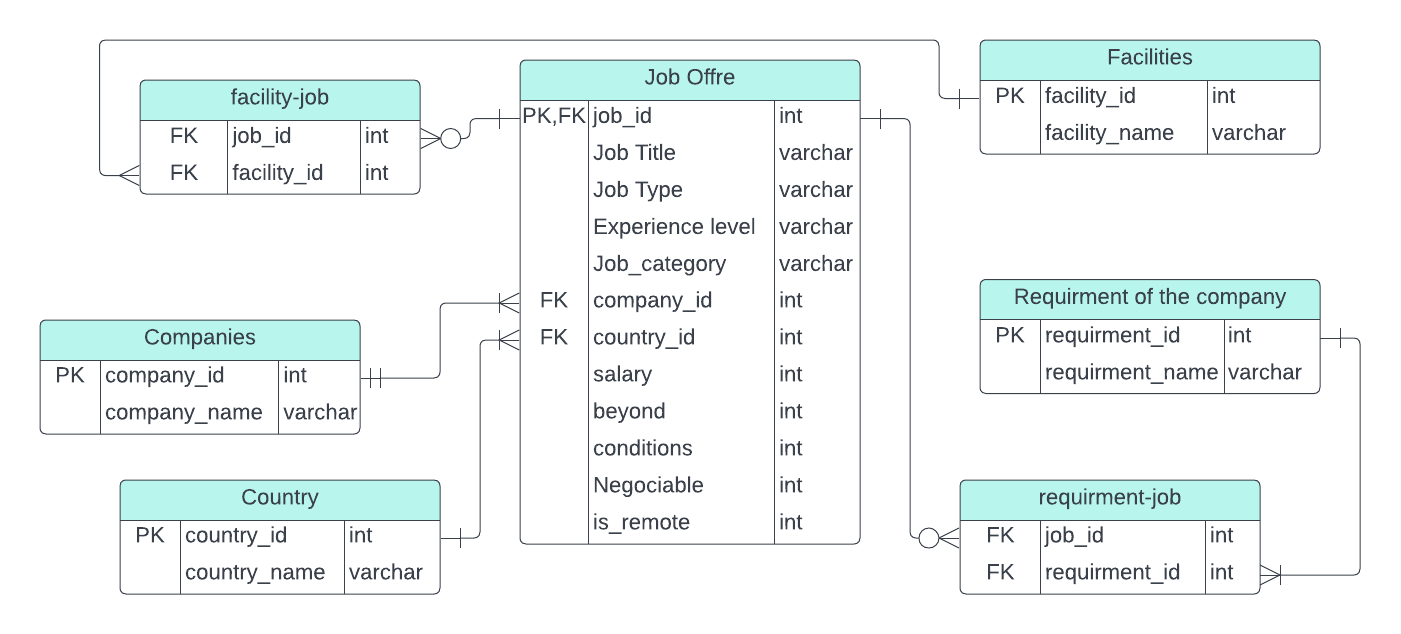

### I created database with the name "TrendJob"

### Database connection details

In [97]:
server = 'LAPTOP-QJ16KG8Q\SQLEXPRESS'
database = 'TrendJob'
password = '' 
driver = '{SQL SERVER}'  

### Database connection

In [98]:
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};PWD={password}')
cursor = conn.cursor()

### Creation table Facilities

In [99]:
cursor.execute("""
    CREATE TABLE [Facilities] (
      [facility_id] int IDENTITY(1,1) PRIMARY KEY,
      [facility_name] varchar(150),
    );
""")
conn.commit()

### Insert data into table Facilities

In [100]:
# Helper function to insert unique facility names and generate new IDs
def insert_facility_name(facility_name):
    # Check if the facility already exists in the table
    cursor.execute("SELECT [facility_id] FROM [Facilities] WHERE [facility_name] = ?", facility_name)
    existing_facility_name = cursor.fetchone()

    if existing_facility_name:
        # facility already exists, return its ID
        return existing_facility_name[0]
    else:
        # facility doesn't exist, insert it and get the generated ID
        cursor.execute("INSERT INTO [Facilities] ([facility_name]) VALUES (?)", facility_name)
        conn.commit()  # Commit the insertion to get the generated ID

        # Retrieve the newly generated facility_id
        cursor.execute("SELECT @@IDENTITY")
        facility_id = cursor.fetchone()[0]

        return facility_id

# Insert data into 'Facilities' table
unique_facilities = set()  # To store unique facility_name

for index, row in df.iterrows():
    # Assuming 'Facilities' column contains a comma-separated string of facilities
    facilities_list = row['Facilities'].split(',')

    for facility_name in facilities_list:
        # Extract and clean facility
        facility_name = facility_name.strip()

        # Insert into 'Facilities' table if it's a unique facility_name
        if facility_name not in unique_facilities:
            insert_facility_name(facility_name)
            unique_facilities.add(facility_name)

### Creation table Country

In [101]:
cursor.execute("""
    CREATE TABLE [Country] (
      [country_id] int IDENTITY(1,1) PRIMARY KEY,
      [country_name] varchar(55),
    );
""")
conn.commit()

### Insert data into table Country

In [102]:
# Helper function to insert unique Location names and generate new IDs
def insert_Location(country):
    # Check if the location name already exists in the table
    cursor.execute("SELECT [country_id] FROM [Country] WHERE [country_name] = ?", country)
    existing_Location = cursor.fetchone()

    if existing_Location:
        # Country already exists, return its ID
        return existing_Location[0]
    else:
        # Country doesn't exist, insert it and get the generated ID
        cursor.execute("INSERT INTO [Country] ( [country_name]) VALUES (?)", country)
        conn.commit()  # Commit the insertion to get the generated ID

        # Retrieve the newly generated country_id
        cursor.execute("SELECT @@IDENTITY")
        country_id = cursor.fetchone()[0]

        return country_id

# Insert data into 'Country' table
for index, row in df.iterrows():
    # Insert into 'Country' table and get the country_id
    country_id = insert_Location(row['country'])

### Creation table Company

In [103]:
cursor.execute("""
    CREATE TABLE [Company] (
      [company_id] int IDENTITY(1,1) PRIMARY KEY,
      [company_name] varchar(55),
    );
""")
conn.commit()

### Insert data into table Company

In [104]:
# Helper function to insert unique company names and generate new IDs
def insert_company(name):
    # Check if the company name already exists in the table
    cursor.execute("SELECT [company_id] FROM [Company] WHERE [company_name] = ?", name)
    existing_company = cursor.fetchone()

    if existing_company:
        # company already exists, return its ID
        return existing_company[0] 
    else:
        # company doesn't exist, insert it and get the generated ID
        cursor.execute("INSERT INTO [Company] ([company_name]) VALUES (?)", name)
        conn.commit()  # Commit the insertion to get the generated ID

        # Retrieve the newly generated company_id
        cursor.execute("SELECT @@IDENTITY")
        company_id = cursor.fetchone()[0]

        return company_id

# Insert data into tables
for index, row in df.iterrows():
    # Insert into 'company' table and get the company_id
    company_id = insert_company(row['Company'])

### Creation table Job Offre

In [105]:
cursor.execute("""

    CREATE TABLE [Job Offre] (
      [job_id] int IDENTITY(1,1) PRIMARY KEY,
      [Job Title] varchar(255),
      [Job Type] varchar(75),
      [Job_category] varchar(75),
      [company_id] int,
      [country_id] int,
      [salary] int,
      [is_remote] int,
      [beyond] int,
      [conditions] int,
      [Negociable] int,
      CONSTRAINT [FK_Job Offre.country_id]
        FOREIGN KEY ([country_id])
          REFERENCES [Country]([country_id]),
      CONSTRAINT [FK_Job Offre.company_id]
        FOREIGN KEY ([company_id])
          REFERENCES [Company]([company_id])
    );
""")
conn.commit()

### Insert data into table Job Offre

In [106]:
df.isnull().sum()

Company                                          0
Job Title                                        0
Location                                         0
Job Type                                         0
Experience level                                 0
Salary                                          99
Requirment of the company                        0
Facilities                                       0
the salary may go beyond                         0
there are additional conditions or footnotes     0
Negociable                                       0
country                                          0
is_remote                                        0
Job_category                                     0
dtype: int64

In [107]:
cn = df.loc[(df['Salary'].isna())]
df = df.drop(cn.index)

In [108]:
# Helper function to insert data into the 'Job Offre' table
def insert_job_offre(job_title, job_type, job_category, company_id, country_id, salary, is_remote, beyond, conditions, negociable):
    cursor.execute("INSERT INTO [Job Offre] ([Job Title], [Job Type], [Job_category], [company_id], [country_id], [Salary], [is_remote], [beyond], [conditions], [Negociable]) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)",
                   job_title, job_type, job_category, company_id, country_id, salary, is_remote, beyond, conditions, negociable)
    conn.commit()

# Insert data into 'Job Offre' table
for index, row in df.iterrows():
    job_title = row['Job Title']
    job_type = row['Job Type']
    job_category = row['Job_category']
    company_name = row['Company']
    country_name = row['country']
    salary = row['Salary']
    is_remote = row['is_remote']
    beyond = row['the salary may go beyond']
    conditions = row['there are additional conditions or footnotes']
    negociable = row['Negociable']

    # Retrieve the company_id and country_id from their respective tables using their names
    cursor.execute("SELECT [company_id] FROM [Company] WHERE [company_name] = ?", company_name)
    company_id = cursor.fetchone()[0]

    cursor.execute("SELECT [country_id] FROM [Country] WHERE [country_name] = ?", country_name)
    country_id = cursor.fetchone()[0]
#     print(row)
    # Insert into 'Job Offre' table
    insert_job_offre(job_title, job_type, job_category, company_id, country_id, salary, is_remote, beyond, conditions, negociable)

### Creation table "Requirment of the company"

In [109]:
cursor.execute("""
    CREATE TABLE [Requirment of the company ] (
      [requirment_id] int IDENTITY(1,1) PRIMARY KEY,
      [requirment_name] varchar(55),
    );
""")
conn.commit()

### Insert data into table Requirment of the company

In [110]:
# Helper function to insert unique Requirment names and generate new IDs
def insert_requirment_name(requirment_name):
    # Check if the Requirment already exists in the table
    cursor.execute("SELECT [requirment_id] FROM [Requirment of the company ] WHERE [requirment_name] = ?", requirment_name)
    existing_requirment_name = cursor.fetchone()

    if existing_requirment_name:
        # Requirment already exists, return its ID
        return existing_requirment_name[0]
    else:
        # Requirment doesn't exist, insert it and get the generated ID
        cursor.execute("INSERT INTO [Requirment of the company] ([requirment_name]) VALUES (?)", requirment_name)
        conn.commit()  # Commit the insertion to get the generated ID

        # Retrieve the newly generated Requirment_id
        cursor.execute("SELECT @@IDENTITY")
        requirment_id = cursor.fetchone()[0]

        return requirment_id

# Insert data into 'Requirment' table
unique_requirment_name = set()  # To store unique Requirment

for index, row in df.iterrows():
    # Assuming 'Requirment' column contains a comma-separated string of Requirment
    Requirment_list = row['Requirment of the company '].split(',')

    for requirment_name in Requirment_list:
        # Extract and clean requirment
        requirment_name = requirment_name.strip()

        # Insert into 'Requirment' table if it's a unique Requirment
        if requirment_name not in unique_requirment_name:
            insert_requirment_name(requirment_name)
            unique_requirment_name.add(requirment_name)

### Creation table facility-job

In [111]:
cursor.execute("""
    CREATE TABLE [facility-job] (
      [job_id] int,
      [facility_id] int,
      CONSTRAINT [FK_facility-job.job_id]
        FOREIGN KEY ([job_id])
          REFERENCES [Job Offre]([job_id]),
      CONSTRAINT [FK_facility-job.facility_id]
        FOREIGN KEY ([facility_id])
          REFERENCES [Facilities]([facility_id])
);
""")
conn.commit()

### Insert data into table facility_job

In [112]:
# Helper function to insert data into the 'facility_job' table
def insert_facility_job(job_id, facility_id):
    cursor.execute("INSERT INTO [facility-job] ([job_id], [facility_id]) VALUES (?, ?)",
                   job_id, facility_id)
    conn.commit()
    
# Insert data into 'facility_job' table
for index, row in df.iterrows():
    job_title = row['Job Title']
    facility_name = row['Facilities']

    # Find the job_id from the 'Job Offer' table based on the 'job_title'
    cursor.execute("SELECT [job_id] FROM [Job Offre] WHERE [Job Title] = ?", job_title)
    job_id = cursor.fetchone()

    # Find the facility_id from the 'Facilities' table based on the 'facility_name'
    cursor.execute("SELECT [facility_id] FROM [Facilities] WHERE [facility_name] = ?", facility_name)
    facility_id = cursor.fetchone()

    if job_id and facility_id:
        job_id = job_id[0]
        facility_id = facility_id[0]
        # Insert into 'facility_job' table
        insert_facility_job(job_id, facility_id)

### Creation table requirment-job

In [113]:
cursor.execute("""
    CREATE TABLE [requirment-job] (
      [job_id] int,
      [requirment_id] int,
      CONSTRAINT [FK_requirment-job.requirment_id]
        FOREIGN KEY ([requirment_id])
          REFERENCES [Requirment of the company]([requirment_id]),
      CONSTRAINT [FK_requirment-job.job_id]
        FOREIGN KEY ([job_id])
          REFERENCES [Job Offre]([job_id])
);
""")
conn.commit()

### Insert data into table requirment_job

In [114]:
# Helper function to insert data into the 'requirment_job' table
def insert_requirment_job(job_id, requirment_id):
    cursor.execute("INSERT INTO [requirment-job] ([job_id], [requirment_id]) VALUES (?, ?)",
                   job_id, requirment_id)
    conn.commit()
    
# Insert data into 'requirment_job' table
for index, row in df.iterrows():
    job_title = row['Job Title']
    Requirment_name= row['Requirment of the company ']

    # Find the job_id from the 'Job Offer' table based on the 'job_title'
    cursor.execute("SELECT [job_id] FROM [Job Offre] WHERE [Job Title] = ?", job_title)
    job_id = cursor.fetchone()

    # Find the requirment_id from the 'Requirment of the company' table based on the 'Requirment of the company'
    cursor.execute("SELECT [requirment_id] FROM [Requirment of the company ] WHERE [requirment_name] = ?", (Requirment_name,))
    requirment_id = cursor.fetchone()

    if job_id and requirment_id:
        job_id = job_id[0]
        requirment_id = requirment_id[0]
        # Insert into 'requirment_job' table
        insert_requirment_job(job_id, requirment_id)

### Creation des indexation pour ameloirer la performance

In [ ]:
cursor.execute("""
CREATE INDEX CountryIndex on "Country" ("Country_name")
""")
conn.commit()

In [ ]:
cursor.execute("""
CREATE INDEX FacilitiyIndex on "Facilities" ("facility_name")
""")
conn.commit()

In [ ]:
cursor.execute("""
CREATE INDEX CountryIndex on "Country" ("Country_name")
""")
conn.commit()

In [ ]:
cursor.execute("""
CREATE INDEX RequirmentIndex on "Requirment of the company" ("requirment_name")
""")
conn.commit()

In [ ]:
# Commit the changes and close the connection
conn.commit()
conn.close()